In [1]:
from scipy.stats import qmc
import pandas as pd
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import shutil
import os
from sklearn.metrics import mean_squared_error
from math import sqrt
import subprocess
import geopandas as gpd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import contextily as ctx

c:\Users\RIPHAWK\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\RIPHAWK\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [10]:
script_dir = os.getcwd()
print("Current Working Directory:", script_dir)

# Construct the path to the CSV file
flowtracker_path = os.path.join(script_dir, '..', 'observations', 'FlowTrackerObs', 'Mainstem_flowtracker.csv')
print("Constructed Path:", flowtracker_path)

Current Working Directory: d:\Ben_wd\THESIS\heatsource\post_defense\scripts\calibration
Constructed Path: d:\Ben_wd\THESIS\heatsource\post_defense\scripts\calibration\..\observations\FlowTrackerObs\Mainstem_flowtracker.csv


In [24]:
#reading in data with relative paths so that it can be used by others who clone repository

# Get the current working directory
script_dir = os.getcwd()
#print(script_dir)

# need to use '..' to go up to parent directory to access observations
flowtracker_path = os.path.join(script_dir, '..', '..', 'observations', 'FlowTrackerObs', 'Mainstem_flowtracker.csv')
flowtracker_path = os.path.abspath(flowtracker_path)  # Resolve '..' and convert to an absolute path

#print(flowtracker_path)
# Reading the CSV file
master_flowtracker = pd.read_csv(flowtracker_path)
master_flowtracker



,index,STREAM_KM,Lat,Lon,Name.1,Datetime,Width,Area,Discharge,discharge_uncertaintyIVE_perc,Depth,Velocity,velocity_uncertaintyIVE_perc
0,WF_ebloomingdaleRd,15.1,43.638220,-90.773430,Wf.eblmrd,6/22/2023 10:01,7.60,2.024,0.476,4.785,0.266,0.235,3.757
1,WF_hayesDOWN,17.6,43.654730,-90.780990,Wf.hayesdn,6/22/2023 13:55,6.80,1.891,0.423,6.230,0.278,0.224,5.936
2,WF_hayesUP,18.5,43.661720,-90.785160,Wf.hayesup2,6/22/2023 16:06,7.60,2.334,0.348,5.416,0.307,0.149,4.593
3,WF_hwy82UP,2.7,43.563830,-90.761460,Wf.hwy82up,5/31/2023 16:12,12.79,4.094,1.078,4.646,0.320,0.263,3.215
4,WF_lukensDOWN,0.0,43.553130,-90.747600,Wf.lukensdown,5/31/2023 11:30,12.90,3.536,1.274,3.144,0.274,0.360,2.323
5,WF_lukensUP,1.2,43.556200,-90.754500,Wf.lukensup,5/31/2023 9:09,16.80,5.736,1.210,2.599,0.341,0.211,1.409
6,WF_pietschrd,7.2,43.589424,-90.773142,Wf.pietsch,6/23/2023 7:21,7.16,2.399,1.076,4.258,0.335,0.449,3.922
7,WF_riverview,19.1,43.665980,-90.789750,Wf.rrunup,7/18/2023 11:47,3.95,0.831,0.147,7.366,0.210,0.177,6.928
8,WF_saunders,4.3,43.573530,-90.763660,Wf.saunders,7/20/2023 9:33,15.40,7.012,0.944,2.474,0.455,0.135,1.771
9,WF_smarthallow,10.9,43.613080,-90.781280,Wf.smarthallowup,6/1/2023 7:18,10.65,3.806,0.596,5.296,0.357,0.156,3.151


In [27]:
# make a new df thats just width and downstream distance, so we can compare to GIS measurements
width_obs = master_flowtracker[['STREAM_KM', 'Width']].copy()
width_obs
flat_df = width_obs.set_index('STREAM_KM').T.reset_index(level=0, drop=True)
flat_df.columns = [float(col) for col in flat_df.columns]
flat_df.drop(19.1, axis=1, inplace=True)
#flat_df = flat_df.drop(columns=flat_df.columns[0])

flat_df.columns
flat_width = flat_df.iloc[0]
flat_width = pd.DataFrame(flat_width)
flat_width = flat_width.reset_index()

flat_width.rename(columns={'index': 'NODE_ID', 0 : 'Width'}, inplace=True)
flat_width['distance downstream'] = 18.3 - flat_width['NODE_ID']
flat_width = flat_width.set_index('NODE_ID')

width_obs = flat_width.sort_values(by='distance downstream')

width_obs

,Width,distance downstream
NODE_ID,,
18.5,7.60,-0.2
17.6,6.80,0.7
16.2,7.60,2.1
15.1,7.60,3.2
13.9,7.50,4.4
12.3,12.45,6.0
11.8,13.80,6.5
10.9,10.65,7.4
9.1,6.05,9.2


In [4]:
base_july_depth = pd.read_csv(os.path.join(r'D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes\calibration\depth_july', 'outputs', 'Hyd_DA.csv'), skiprows=6,
         usecols=range(1, 185))
base_july_depth.columns = [float(col) for col in base_july_depth.columns]
base_july_depth = base_july_depth.iloc[0]
base_july_depth = pd.DataFrame(base_july_depth)
base_july_depth = base_july_depth.reset_index()

base_july_depth.rename(columns={'index': 'NODE_ID', 0 : 'Modeled Depth'}, inplace=True)
base_july_depth = base_july_depth.set_index('NODE_ID')

base_july_depth

,Modeled Depth
NODE_ID,
18.3,0.0526
18.2,0.0668
18.1,0.0676
18.0,0.0496
17.9,0.0951
...,...
0.4,0.2608
0.3,0.2451
0.2,0.1526


In [5]:
joined_df = pd.merge(flat_width, base_july_depth['Modeled Depth'], left_index=True, right_index=True, how='left')
print(joined_df.iloc[0]['Depth'] - joined_df.iloc[0]['Modeled Depth'])

KeyError: 'Depth'

In [ ]:
sampler = qmc.LatinHypercube(d=1)
sample = sampler.random(n=25)

l_bounds = [.01]
u_bounds = [.5]
lhs = qmc.scale(sample, l_bounds, u_bounds)
lhs

In [ ]:
## TRYING FROM CHATGPT
import pandas as pd
import numpy as np
import os
import subprocess

source_folder = r'D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes\calibration\depth_july\updated_chanwidth'
os.chdir(source_folder)  # Change the current working directory
morph_file = pd.read_csv(os.path.join(source_folder, "inputs", 'WFK23_morphology.csv'))

overall_error = []
error_df = pd.DataFrame(columns=["mannings N", "error"])
rmse_df = pd.DataFrame(columns=["mannings N", "error"])  # Initialize rmse_df

master_df = pd.DataFrame(columns=["stream_km", "mannings_N", "depth_error"])  # Initialize master_df

loop_counter = 0
for index, row in flat_width.iterrows():
    rmse_df = pd.DataFrame(columns=["mannings N", "error"])  # Initialize rmse_df
    print('Node ID : ' + str(index))
    for n in range(25):
        # Populate BHF parameters
        print('mannings n : ' + str(float(lhs[n])))
        morph_file['MANNINGS_n'] = float(lhs[n])  # Assuming lhs is properly defined elsewhere
        print(morph_file['MANNINGS_n'])  # Assuming lhs is properly defined elsewhere

        morph_file.to_csv(os.path.join(source_folder, "inputs", 'WFK23_morphology.csv'), index=False)
        try:
            # Run HS9
            subprocess.run(['hs', 'run', '-t'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
            # Get data
            base_july_depth = pd.read_csv(os.path.join(source_folder, 'outputs', 'Hyd_DA.csv'), skiprows=6,
                                          usecols=range(1, 185))
            base_july_depth.columns = [float(col) for col in base_july_depth.columns]
            base_july_depth = base_july_depth.iloc[0]
            base_july_depth = pd.DataFrame(base_july_depth)
            base_july_depth = base_july_depth.reset_index()

            base_july_depth.rename(columns={'index': 'NODE_ID', 0: 'Modeled Depth'}, inplace=True)
            base_july_depth = base_july_depth.set_index('NODE_ID')

            joined_df = pd.merge(flat_width, base_july_depth['Modeled Depth'], left_index=True, right_index=True, how='left')
            print('joined df : ' + str(joined_df))
            depth_error = joined_df.loc[index]['Depth'] - joined_df.loc[index]['Modeled Depth']

            # Create a DataFrame for the current loop's data
            row_data = np.array([index, lhs[n], depth_error])
            row_df = pd.DataFrame([row_data], columns=master_df.columns)
            master_df = pd.concat([master_df, row_df], ignore_index=True)

            loop_counter += 1
            print(master_df)
        except:
            continue

master_df.to_csv(os.path.join(source_folder, 'results_master_df.csv'), index=False)


In [ ]:
master_df['abs_error'] = abs(master_df['depth_error'])
sorted_df = master_df.groupby('stream_km')['abs_error'].min()
sorted_df

In [ ]:
master_df

In [ ]:
row_data = np.append(lhs[n], depth_error)  # Correctly concatenate lhs[n] and depth_error
rmse_df = pd.concat([rmse_df, pd.DataFrame([row_data], columns=error_df.columns)], ignore_index=True)
rmse_df

In [ ]:
rmse_df.to_csv('18.3_rmse_data.csv', index=False)  # Adjust filename as needed

rmse_sorted = rmse_df.sort_values(by='error', ascending=True)
rmse_sorted

In [9]:
base_july_width = pd.read_csv(os.path.join(r'D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes\calibration\depth_july', 'outputs', 'Hyd_WT.csv'), skiprows=6,
                                      usecols=range(1, 185))
base_july_width.columns = [float(col) for col in base_july_width.columns]
base_july_width

,18.3,18.2,18.1,18.0,17.9,17.8,17.7,17.6,17.5,17.4,...,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0
0,12.4557,10.8147,7.2264,13.0165,3.9273,6.8141,5.9533,8.8396,4.5482,11.1235,...,13.163,10.6155,8.9547,18.6174,12.8242,7.0919,7.7041,11.9097,8.2283,11.9752
1,12.4557,10.8147,7.2264,13.0165,3.9273,6.8141,5.9533,8.8396,4.5482,11.1235,...,13.163,10.6155,8.9547,18.6174,12.8242,7.0919,7.7041,11.9097,8.2283,11.9752
2,12.4557,10.8147,7.2264,13.0165,3.9273,6.8141,5.9533,8.8396,4.5482,11.1235,...,13.163,10.6155,8.9547,18.6174,12.8242,7.0919,7.7041,11.9097,8.2283,11.9752
3,12.4557,10.8147,7.2264,13.0165,3.9273,6.8141,5.9533,8.8396,4.5482,11.1235,...,13.163,10.6155,8.9547,18.6174,12.8242,7.0919,7.7041,11.9097,8.2283,11.9752
4,12.4557,10.8147,7.2264,13.0165,3.9273,6.8141,5.9533,8.8396,4.5482,11.1235,...,13.163,10.6155,8.9547,18.6174,12.8242,7.0919,7.7041,11.9097,8.2283,11.9752
5,12.4557,10.8147,7.2264,13.0165,3.9273,6.8141,5.9533,8.8396,4.5482,11.1235,...,13.163,10.6155,8.9547,18.6174,12.8242,7.0919,7.7041,11.9097,8.2283,11.9752
6,12.4557,10.8147,7.2264,13.0165,3.9273,6.8141,5.9533,8.8396,4.5482,11.1235,...,13.163,10.6155,8.9547,18.6174,12.8242,7.0919,7.7041,11.9097,8.2283,11.9752
7,12.4557,10.8147,7.2264,13.0165,3.9273,6.8141,5.9533,8.8396,4.5482,11.1235,...,13.163,10.6155,8.9547,18.6174,12.8242,7.0919,7.7041,11.9097,8.2283,11.9752
8,12.4557,10.8147,7.2264,13.0165,3.9273,6.8141,5.9533,8.8396,4.5482,11.1235,...,13.163,10.6155,8.9547,18.6174,12.8242,7.0919,7.7041,11.9097,8.2283,11.9752
9,12.4557,10.8147,7.2264,13.0165,3.9273,6.8141,5.9533,8.8396,4.5482,11.1235,...,13.163,10.6155,8.9547,18.6174,12.8242,7.0919,7.7041,11.9097,8.2283,11.9752


In [10]:
width_obs = master_flowtracker[['STREAM_KM', 'Width']].copy()
width_obs
flat_width = width_obs.set_index('STREAM_KM').T.reset_index(level=0, drop=True)
flat_width.columns = [float(col) for col in flat_width.columns]
flat_width.drop(19.1, axis=1, inplace=True)
#flat_df = flat_df.drop(columns=flat_df.columns[0])

flat_width.columns
flat_width = flat_width.iloc[0]
flat_width = pd.DataFrame(flat_width)
flat_width = flat_width.reset_index()

flat_width.rename(columns={'index': 'NODE_ID', 0 : 'Width'}, inplace=True)
flat_width['distance downstream'] = 18.3 - flat_width['NODE_ID']

flat_width = flat_width.sort_values(by='distance downstream')

flat_width

,NODE_ID,Width,distance downstream
2,18.3,7.60,0.0
1,17.5,6.80,0.8
10,16.1,7.60,2.2
0,15.0,7.60,3.3
15,13.8,7.50,4.5
12,12.2,12.45,6.1
11,11.7,13.80,6.6
8,10.9,10.65,7.4
14,9.1,6.05,9.2
9,8.7,6.42,9.6


In [11]:
sim_width_df = base_july_width.copy()#[flat_df.columns]
#sim_tw = sim_tw_df.to_numpy()
sim_width_df
sim_width = sim_width_df.iloc[0]#.to_numpy()
sim_width = pd.DataFrame(sim_width)
sim_width = sim_width.reset_index()
sim_width.rename(columns={'index': 'NODE_ID', 0 : 'Width'}, inplace=True)
sim_width['distance downstream'] = 18.3 - sim_width['NODE_ID']
sim_width = sim_width.sort_values(by='distance downstream')

sim_width

,NODE_ID,Width,distance downstream
0,18.3,12.4557,0.0
1,18.2,10.8147,0.1
2,18.1,7.2264,0.2
3,18.0,13.0165,0.3
4,17.9,3.9273,0.4
...,...,...,...
179,0.4,7.0919,17.9
180,0.3,7.7041,18.0
181,0.2,11.9097,18.1
182,0.1,8.2283,18.2


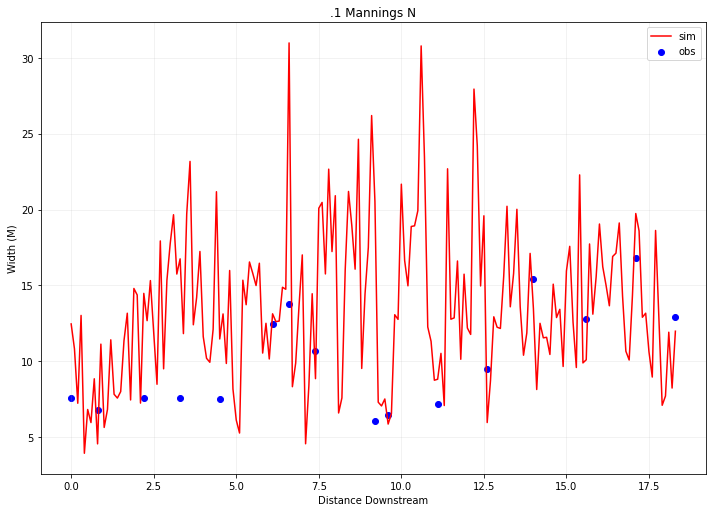

In [12]:
plt.figure(figsize=(10, 7))

plt.plot(sim_width['distance downstream'], sim_width['Width'], label = 'sim',color = 'red')
plt.scatter(flat_width['distance downstream'], flat_width['Width'], label = 'obs',color = 'blue')
plt.legend()
plt.ylabel('Width (M)')
plt.xlabel('Distance Downstream')
#plt.figure(facecolor='black')

    # Adjust layout
plt.tight_layout()
plt.grid(alpha = .2)
#plt.ylim(19, 22)
#plt.vlines(trib_dict_downstream, ymin = 20, ymax = 25, label = 'Tribs',color = 'Orange', linestyles = 'dashed')
plt.legend()
plt.title('.1 Mannings N')
plt.savefig('DepthDownstreamvsOBS_01.png')
plt.show()


In [13]:
width_sorted = sim_width.sort_values(by='Width', ascending = False)
width_sorted.head(30)

,NODE_ID,Width,distance downstream
66,11.7,30.9831,6.6
106,7.7,30.7852,10.6
122,6.1,27.9394,12.2
91,9.2,26.1941,9.1
87,9.6,24.6318,8.7
123,6.0,24.2055,12.3
107,7.6,23.4651,10.7
36,14.7,23.1710,3.6
114,6.9,22.6839,11.4
78,10.5,22.6602,7.8


## Showing Updated channelwidth

In [ ]:
updated_july_width = pd.read_csv(os.path.join(r'D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes\calibration\depth_july\updated_chanwidth', 'outputs', 'Hyd_WT.csv'), skiprows=6,
                                      usecols=range(1, 185))
updated_july_width.columns = [float(col) for col in updated_july_width.columns]
updated_width_df = updated_july_width.copy()#[flat_df.columns]
#sim_tw = sim_tw_df.to_numpy()

updated_width = updated_width_df.iloc[0]#.to_numpy()
updated_width = pd.DataFrame(updated_width)
updated_width = updated_width.reset_index()
updated_width.rename(columns={'index': 'NODE_ID', 0 : 'Width'}, inplace=True)
updated_width['distance downstream'] = 18.3 - updated_width['NODE_ID']
updated_width = updated_width.sort_values(by='distance downstream')

plt.figure(figsize=(10, 7))

plt.plot(updated_width['distance downstream'], updated_width['Width'], label = 'updated_width',color = 'red')
plt.plot(sim_width['distance downstream'], sim_width['Width'], label = 'old width',color = 'black', alpha = .2)

plt.scatter(flat_width['distance downstream'], flat_width['Width'], label = 'obs',color = 'blue')
plt.legend()
plt.ylabel('Width (M)')
plt.xlabel('Distance Downstream')
#plt.figure(facecolor='black')

    # Adjust layout
plt.tight_layout()
plt.grid(alpha = .2)
#plt.ylim(19, 22)
#plt.vlines(trib_dict_downstream, ymin = 20, ymax = 25, label = 'Tribs',color = 'Orange', linestyles = 'dashed')
plt.legend()
plt.title('.1 Mannings N')
plt.savefig('DepthDownstreamvsOBS_01.png')
plt.show()



In [ ]:
flat_width

### Plotting widths from updated 10m model

In [14]:
#observed width at 10m accuracy
master_flowtracker_10m = pd.read_csv("D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes10m\FlowtrackerMaster_Nodes10mJOIN.csv")
width10m_obs = master_flowtracker_10m[['STREAM_KM10m', 'Width']].copy()

width10m = width10m_obs.set_index('STREAM_KM10m').T.reset_index(level=0, drop=True)
width10m.columns = [float(col) for col in width10m.columns]
width10m.drop(19.1, axis=1, inplace=True)

#width10m = width10m.drop(columns=width10m.columns[0])

# flat_width.columns
width10m = width10m.iloc[0]
width10m = pd.DataFrame(width10m)
width10m = width10m.reset_index()

width10m.rename(columns={'index': 'NODE_ID', 0 : 'Width'}, inplace=True)
width10m['distance downstream'] = 18.35 - width10m['NODE_ID']

width10m = width10m.sort_values(by='distance downstream')

# flat_width
width10m

,NODE_ID,Width,distance downstream
2,18.35,7.60,0.00
1,17.48,6.80,0.87
10,16.08,7.60,2.27
0,14.99,7.60,3.36
15,13.83,7.50,4.52
12,12.21,12.45,6.14
11,11.74,13.80,6.61
8,10.87,10.65,7.48
14,9.08,6.05,9.27
9,8.70,6.42,9.65


In [15]:
#modeled 10m width
sim_10mwidth = pd.read_csv(os.path.join(r'D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes10m\manningsn_calibration', 'outputs', 'Hyd_WT.csv'), skiprows=6,
                                      usecols=range(1, 1837))
sim_10mwidth.columns = [float(col) for col in sim_10mwidth.columns]
sim_10mwidth = sim_10mwidth.copy()#[flat_df.columns]
#sim_tw = sim_tw_df.to_numpy()

sim_10mwidth = sim_10mwidth.iloc[0]#.to_numpy()
sim_10mwidth = pd.DataFrame(sim_10mwidth)
sim_10mwidth = sim_10mwidth.reset_index()
sim_10mwidth.rename(columns={'index': 'NODE_ID', 0 : 'Width'}, inplace=True)
sim_10mwidth['distance downstream'] = 18.35 - sim_10mwidth['NODE_ID']
sim_10mwidth = sim_10mwidth.sort_values(by='distance downstream')
sim_10mwidth

,NODE_ID,Width,distance downstream
0,18.35,9.3198,0.00
1,18.34,9.2000,0.01
2,18.33,12.2139,0.02
3,18.32,12.4538,0.03
4,18.31,12.3283,0.04
...,...,...,...
1831,0.04,13.6944,18.31
1832,0.03,14.9088,18.32
1833,0.02,12.5038,18.33
1834,0.01,11.5526,18.34


In [19]:
sim_10mdepth= pd.read_csv(os.path.join(r'D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes10m\manningsn_calibration', 'outputs', 'Hyd_DA.csv'), skiprows=6,)

sim_10mdepth

,Datetime,18.350,18.340,18.330,18.320,18.310,18.300,18.290,18.280,18.270,...,0.090,0.080,0.070,0.060,0.050,0.040,0.030,0.020,0.010,0.000


In [16]:
#modeled 10m Depth
sim_10mdepth= pd.read_csv(os.path.join(r'D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes10m\manningsn_calibration', 'outputs', 'Hyd_DA.csv'), skiprows=6,
                                      usecols=range(1, 1837))
sim_10mdepth.columns = [float(col) for col in sim_10mdepth.columns]
sim_10mdepth = sim_10mdepth.copy()#[flat_df.columns]
#sim_tw = sim_tw_df.to_numpy()

sim_10mdepth = sim_10mdepth.iloc[0]#.to_numpy()
sim_10mdepth = pd.DataFrame(sim_10mdepth)
sim_10mdepth = sim_10mdepth.reset_index()
sim_10mdepth.rename(columns={'index': 'NODE_ID', 0 : 'Depth'}, inplace=True)
sim_10mdepth['distance downstream'] = 18.35 - sim_10mdepth['NODE_ID']
sim_10mdepth = sim_10mdepth.sort_values(by='distance downstream')
sim_10mdepth

IndexError: single positional indexer is out-of-bounds

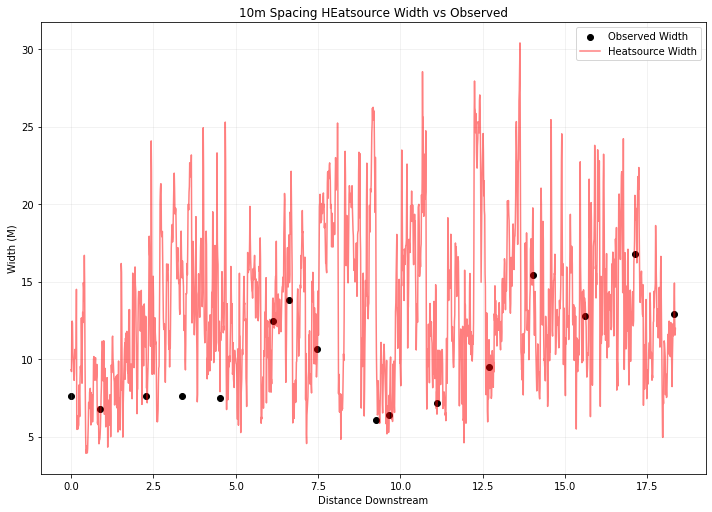

In [24]:

plt.figure(figsize=(10, 7))
plt.scatter(width10m['distance downstream'], width10m['Width'], label = 'Observed Width',color = 'black')

plt.plot(sim_10mwidth['distance downstream'], sim_10mwidth['Width'], label = 'Heatsource Width',color = 'red', alpha = .5)

#plt.scatter(flat_width['distance downstream'], flat_width['Width'], label = 'obs',color = 'blue')
plt.legend()
plt.ylabel('Width (M)')
plt.xlabel('Distance Downstream')
#plt.figure(facecolor='black')

    # Adjust layout
plt.tight_layout()
plt.grid(alpha = .2)
#plt.ylim(19, 22)
#plt.vlines(trib_dict_downstream, ymin = 20, ymax = 25, label = 'Tribs',color = 'Orange', linestyles = 'dashed')
plt.legend()
plt.title('10m Spacing HEatsource Width vs Observed')
plt.savefig('10mHeatsourcevsObserved.png', bbox_inches='tight', dpi=300)
plt.show()



In [21]:
#observed width at 10m accuracy
master_flowtracker_10m = pd.read_csv("D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes10m\FlowtrackerMaster_Nodes10mJOIN.csv")
depth10m_obs = master_flowtracker_10m[['STREAM_KM10m', 'Depth']].copy()

depth10m = depth10m_obs.set_index('STREAM_KM10m').T.reset_index(level=0, drop=True)
depth10m.columns = [float(col) for col in depth10m.columns]
depth10m.drop(19.1, axis=1, inplace=True)

#width10m = width10m.drop(columns=width10m.columns[0])

# flat_width.columns
depth10m = depth10m.iloc[0]
depth10m = pd.DataFrame(depth10m)
depth10m = depth10m.reset_index()

depth10m.rename(columns={'index': 'NODE_ID', 0 : 'Depth'}, inplace=True)
depth10m['distance downstream'] = 18.35 - depth10m['NODE_ID']

depth10m = depth10m.sort_values(by='distance downstream')

# flat_width
depth10m

,NODE_ID,Depth,distance downstream
2,18.35,0.307,0.00
1,17.48,0.278,0.87
10,16.08,0.265,2.27
0,14.99,0.266,3.36
15,13.83,0.266,4.52
12,12.21,0.202,6.14
11,11.74,0.322,6.61
8,10.87,0.357,7.48
14,9.08,0.264,9.27
9,8.70,0.175,9.65


KeyError: 'distance downstream'

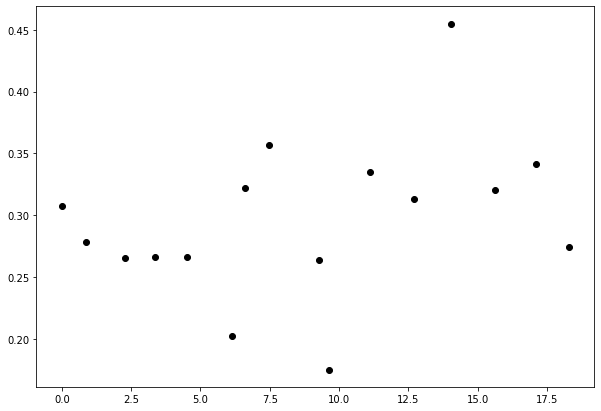

In [22]:
plt.figure(figsize=(10, 7))
plt.scatter(depth10m['distance downstream'], depth10m['Depth'], label = 'Observed Depth',color = 'black')

plt.plot(sim_10mdepth['distance downstream'], sim_10mdepth['Depth'], label = 'Heatsource Depth',color = 'red', alpha = .5)

#plt.scatter(flat_width['distance downstream'], flat_width['Width'], label = 'obs',color = 'blue')
plt.legend()
plt.ylabel('Depth (M)')
plt.xlabel('Distance Downstream')
#plt.figure(facecolor='black')

    # Adjust layout
plt.tight_layout()
plt.grid(alpha = .2)
#plt.ylim(19, 22)
#plt.vlines(trib_dict_downstream, ymin = 20, ymax = 25, label = 'Tribs',color = 'Orange', linestyles = 'dashed')
plt.legend()
plt.title('10m Spacing HEatsource Width vs Observed')
plt.savefig('10mHeatsourcevsObserved.png')
plt.show()


